In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    read_csv_from_web,
    implementChannelWidthLimit,
    fromHB5Table1,
    readHEPDataCsv,
)
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit, validateChannelWidthLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# CMS 13TeV LHC

## `ZH > mumu` [2402.11098](https://arxiv.org/abs/2402.11098)

Implemented is what they call the "Higgs-like" case

--2024-03-15 18:13:41--  https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(%24%5Cmu%5Cmu%24)%2C%20%24Z%5Cphi%24%20H-like/2/csv
Resolving www.hepdata.net (www.hepdata.net)... 188.185.7.34, 137.138.123.58, 188.185.72.42, ...
Connecting to www.hepdata.net (www.hepdata.net)|188.185.7.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16998 (17K) [text/csv]
Saving to: ‘csv’

     0K .......... ......                                     100% 1.46M=0.01s

2024-03-15 18:13:47 (1.46 MB/s) - ‘csv’ saved [16998/16998]



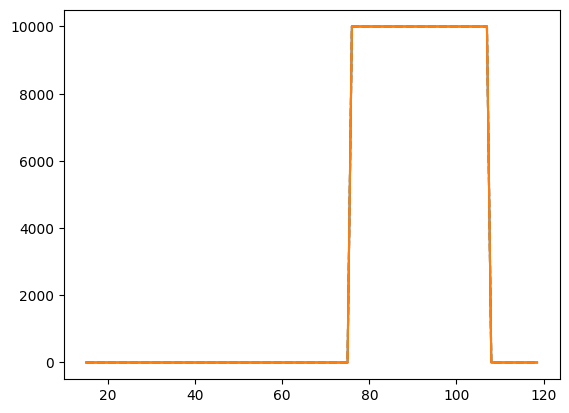

Looks good. Saving this to ZHlowMass_LHC13_CMS_138.json


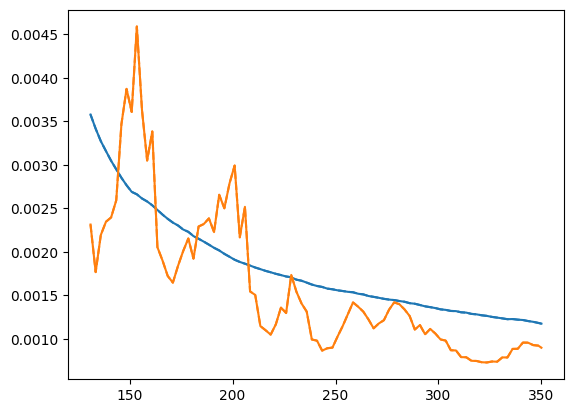

Looks good. Saving this to ZHhighMass_LHC13_CMS_138.json


In [3]:
os.system("wget 'https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(%24%5Cmu%5Cmu%24)%2C%20%24Z%5Cphi%24%20H-like/2/csv'")
os.system("head -n 231 csv > topcsv")
os.system("tail -n 225 csv > bottomcsv")

df1 = pd.read_csv(
    "topcsv",
    comment="#")
df2 = pd.read_csv(
    "bottomcsv",
    comment="#")

os.system("rm csv")
os.system("rm topcsv")
os.system("rm bottomcsv")

df = pd.DataFrame()
df["m"] = df1["$m_{\phi}$ [GeV]"]
df["obs"] = df1["Observed 95% CL upper limit on $\sigma B$ [pb]"]
df["exp"] = df2["Median expected 95% CL upper limit on $\sigma B$ [pb]"]

dflow = df[df["m"] < 120.0]
# Add grey block without limit to dflow
dflowgrey = pd.DataFrame(
    [
        {"m": 76.0, "obs": 10000, "exp": 10000},
        {"m": 107.0, "obs": 10000, "exp": 10000}
    ]
)
dflow = pd.concat([dflow, dflowgrey])
dflow.sort_values(by=["m"], inplace=True)
dflow.reset_index(inplace=True)

dfhigh = df[df["m"] > 130.0]
dfhigh.reset_index(inplace=True)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["HZ", "mumu"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t55",
    dflow,
    idSuffix=17,
    prefix="ZHlowMass",
    massResolution=resolution.mumu["light"]
)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["HZ", "mumu"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t55",
    dfhigh,
    idSuffix=18,
    prefix="ZHhighMass",
    massResolution=resolution.mumu["light"]
)


## `WH > mumu` [2402.11098](https://arxiv.org/abs/2402.11098)

Implemented is what they call the "Higgs-like" case

--2024-03-15 18:20:48--  https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(%24%5Cmu%5Cmu%24)%2C%20%24W%5Cphi%24%20H-like/2/csv
Resolving www.hepdata.net (www.hepdata.net)... 137.138.123.58, 137.138.52.170, 188.185.72.42, ...
Connecting to www.hepdata.net (www.hepdata.net)|137.138.123.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17052 (17K) [text/csv]
Saving to: ‘csv.1’

     0K .......... ......                                     100% 1.61M=0.01s

2024-03-15 18:20:59 (1.61 MB/s) - ‘csv.1’ saved [17052/17052]



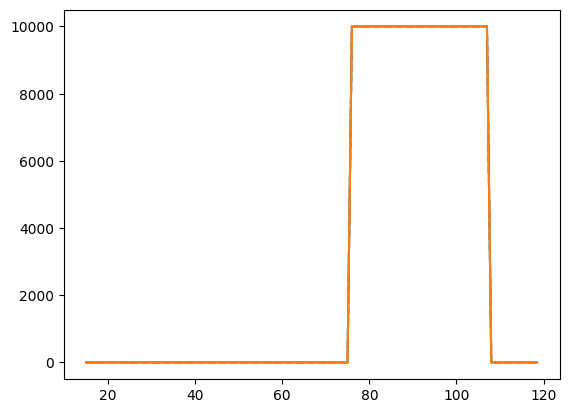

Looks good. Saving this to WHlowMass_LHC13_CMS_138.json


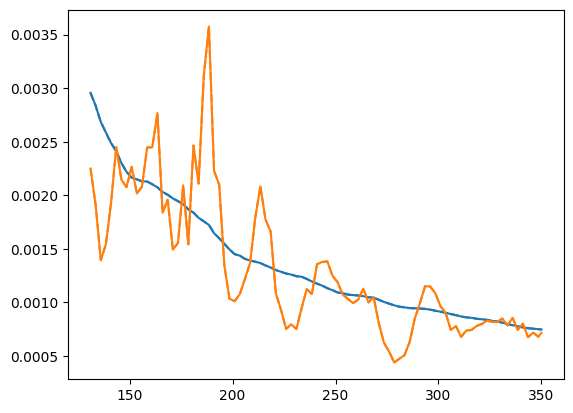

Looks good. Saving this to WHhighMass_LHC13_CMS_138.json


In [4]:
os.system("wget 'https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(%24%5Cmu%5Cmu%24)%2C%20%24W%5Cphi%24%20H-like/2/csv'")
os.system("head -n 231 csv > topcsv")
os.system("tail -n 225 csv > bottomcsv")

df1 = pd.read_csv(
    "topcsv",
    comment="#")
df2 = pd.read_csv(
    "bottomcsv",
    comment="#")

os.system("rm csv")
os.system("rm topcsv")
os.system("rm bottomcsv")

df = pd.DataFrame()
df["m"] = df1["$m_{\phi}$ [GeV]"]
df["obs"] = df1["Observed 95% CL upper limit on $\sigma B$ [pb]"]
df["exp"] = df2["Median expected 95% CL upper limit on $\sigma B$ [pb]"]

dflow = df[df["m"] < 120.0]
# Add grey block without limit to dflow
dflowgrey = pd.DataFrame(
    [
        {"m": 76.0, "obs": 10000, "exp": 10000},
        {"m": 107.0, "obs": 10000, "exp": 10000}
    ]
)
dflow = pd.concat([dflow, dflowgrey])
dflow.sort_values(by=["m"], inplace=True)
dflow.reset_index(inplace=True)

dfhigh = df[df["m"] > 130.0]
dfhigh.reset_index(inplace=True)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["HW", "mumu"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t54",
    dflow,
    idSuffix=19,
    prefix="WHlowMass",
    massResolution=resolution.mumu["light"]
)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["HW", "mumu"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t54",
    dfhigh,
    idSuffix=20,
    prefix="WHhighMass",
    massResolution=resolution.mumu["light"]
)


## `ttH > mumu` CP-even [1911.04968](https://arxiv.org/abs/1911.04968)
We ignore potential `tH` and `tWH` contributions for a conservative limit. 

This limit has an intermediate region where there is no sensitivity, that's why we add the datapoints with huge limit values.

Replaced by updated CMS search: [2402.11098](https://arxiv.org/abs/2402.11098) (see below)

/formswap/biekoetter/ipykernel_14658/1039842344.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(


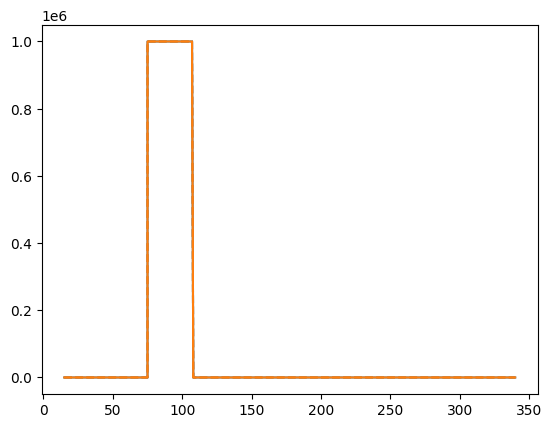

Looks good. Saving this to Htt_LHC13_CMS_137.json


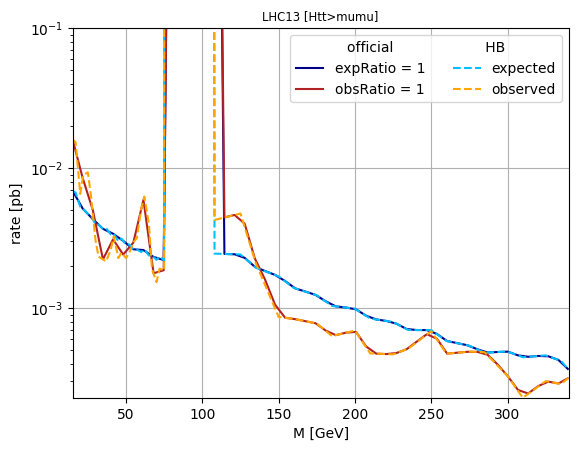

In [2]:
# dfExp = read_csv_from_web(
#     "https://www.hepdata.net/download/table/ins1764474/Figure%2012c/1/csv",
#     comment="#",
#     skiprows=55,
#     skipfooter=149 - 101,
#     engine="python",
#     names=["m", "exp", "unc+", "unc-", "unc++", "unc--"],
# )

# df = read_csv_from_web(
#     "https://www.hepdata.net/download/table/ins1764474/Figure%2012c/1/csv",
#     comment="#",
#     skiprows=8,
#     skipfooter=149 - 54,
#     engine="python",
#     names=["m", "obs"],
# )
# assert np.allclose(df.m, dfExp.m)
# df["exp"] = dfExp.exp
# df = (
#     df.append(
#         pd.DataFrame(data={"m": [75.01, 107.09], "obs": 1e6, "exp": 1e6}),
#         ignore_index=True,
#     )
#     .sort_values("m")
#     .reset_index(drop=True)
# )

# process = {"channels": [["Htt", "mumu"]]}
# limitFile = implementChannelLimit(
#     "1911.04968",
#     process,
#     "https://doi.org/10.17182/hepdata.91969.v1/t51",
#     df,
#     idSuffix=1,
#     massResolution=resolution.mumu["light"],
# )
# lim = HB.Limit(limitFile)
# fig, ax = validateChannelLimit(lim)
# ax.set_ylim(top=1e-1);


## `ttH > mumu` CP-odd [1911.04968](https://arxiv.org/abs/1911.04968)
Same coments as the CP-even version.

Replaced by updated CMS search: [2402.11098](https://arxiv.org/abs/2402.11098) (see below)

/formswap/biekoetter/ipykernel_14658/1066468661.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(


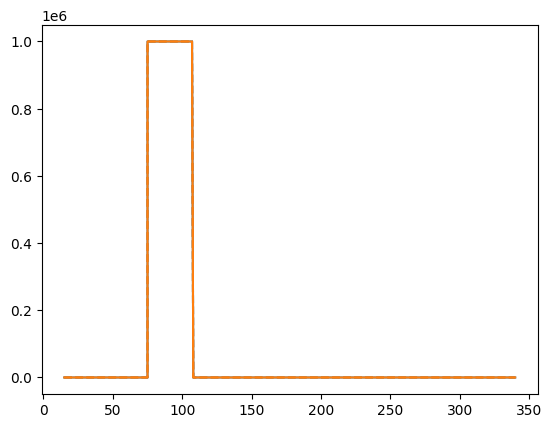

Looks good. Saving this to Att_LHC13_CMS_137.json


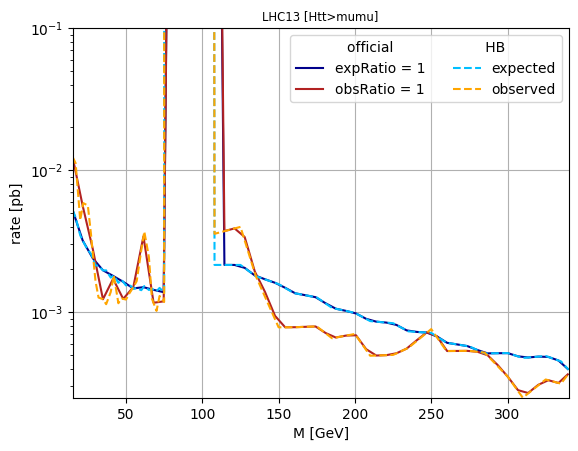

In [3]:
# dfExp = read_csv_from_web(
#     "https://www.hepdata.net/download/table/ins1764474/Figure%2012d/1/csv",
#     comment="#",
#     skiprows=55,
#     skipfooter=149 - 101,
#     engine="python",
#     names=["m", "exp", "unc+", "unc-", "unc++", "unc--"],
# )

# df = read_csv_from_web(
#     "https://www.hepdata.net/download/table/ins1764474/Figure%2012d/1/csv",
#     comment="#",
#     skiprows=8,
#     skipfooter=149 - 54,
#     engine="python",
#     names=["m", "obs"],
# )
# assert np.allclose(df.m, dfExp.m)
# df["exp"] = dfExp.exp
# df = (
#     df.append(
#         pd.DataFrame(data={"m": [75.01, 107.09], "obs": 1e6, "exp": 1e6}),
#         ignore_index=True,
#     )
#     .sort_values("m")
#     .reset_index(drop=True)
# )

# process = {"channels": [["Htt", "mumu"]]}
# limitFile = implementChannelLimit(
#     "1911.04968",
#     process,
#     "https://doi.org/10.17182/hepdata.91969.v1/t52",
#     df,
#     idSuffix=2,
#     prefix="Att",
#     massResolution=resolution.mumu["light"],
# )
# lim = HB.Limit(limitFile)
# fig, ax = validateChannelLimit(lim)
# ax.set_ylim(top=1e-1);


## `ttH > mumu` CP-even [2402.11098](https://arxiv.org/abs/2402.11098)
We ignore potential `tH` and `tWH` contributions for a conservative limit. 

--2024-02-23 17:26:39--  https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(%24%5Cmu%5Cmu%24)%2C%20%24t%5Cbar%7Bt%7D%20%5Cphi%24%20Scalar/2/csv
Resolving www.hepdata.net (www.hepdata.net)... 137.138.123.58, 188.185.7.34, 188.185.72.42, ...
Connecting to www.hepdata.net (www.hepdata.net)|137.138.123.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17829 (17K) [text/csv]
Saving to: ‘csv’

     0K .......... .......                                    100% 1.57M=0.01s

2024-02-23 17:28:30 (1.57 MB/s) - ‘csv’ saved [17829/17829]



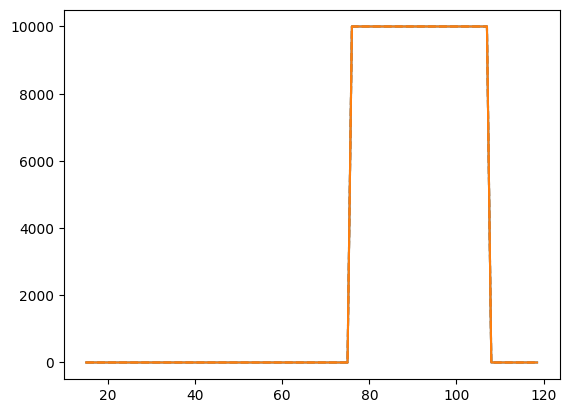

Looks good. Saving this to ttHlowMass_LHC13_CMS_138.json


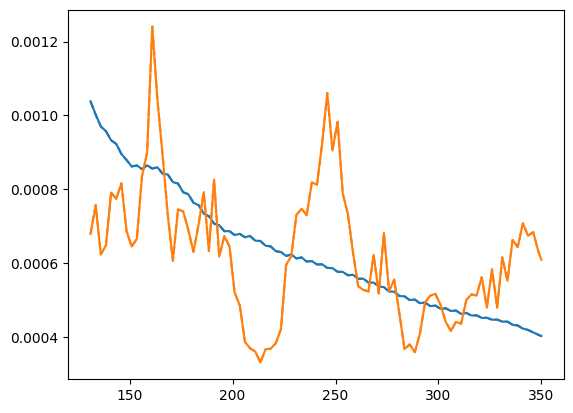

Looks good. Saving this to ttHhighMass_LHC13_CMS_138.json


In [5]:
os.system("wget 'https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(%24%5Cmu%5Cmu%24)%2C%20%24t%5Cbar%7Bt%7D%20%5Cphi%24%20Scalar/2/csv'")
os.system("head -n 231 csv > topcsv")
os.system("tail -n 225 csv > bottomcsv")

df1 = pd.read_csv(
    "topcsv",
    comment="#")
df2 = pd.read_csv(
    "bottomcsv",
    comment="#")

os.system("rm csv")
os.system("rm topcsv")
os.system("rm bottomcsv")

df = pd.DataFrame()
df["m"] = df1["$m_{\phi}$ [GeV]"]
df["obs"] = df1["Observed 95% CL upper limit on $\sigma B$ [pb]"]
df["exp"] = df2["Median expected 95% CL upper limit on $\sigma B$ [pb]"]

dflow = df[df["m"] < 120.0]
# Add grey block without limit to dflow
dflowgrey = pd.DataFrame(
    [
        {"m": 76.0, "obs": 10000, "exp": 10000},
        {"m": 107.0, "obs": 10000, "exp": 10000}
    ]
)
dflow = pd.concat([dflow, dflowgrey])
dflow.sort_values(by=["m"], inplace=True)
dflow.reset_index(inplace=True)

dfhigh = df[df["m"] > 130.0]
dfhigh.reset_index(inplace=True)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["Htt", "mumu"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t60",
    dflow,
    idSuffix=5,
    prefix="ttHlowMass",
    massResolution=resolution.mumu["light"],
    constraints={"CPValue": "even"},
)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["Htt", "mumu"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t60",
    dfhigh,
    idSuffix=6,
    prefix="ttHhighMass",
    massResolution=resolution.mumu["light"],
    constraints={"CPValue": "even"},
)

## `ttH > mumu` CP-odd [2402.11098](https://arxiv.org/abs/2402.11098)
We ignore potential `tH` and `tWH` contributions for a conservative limit. 

--2024-02-23 17:33:08--  https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(%24%5Cmu%5Cmu%24)%2C%20%24t%5Cbar%7Bt%7D%20%5Cphi%24%20Pseudoscalar/2/csv
Resolving www.hepdata.net (www.hepdata.net)... 137.138.52.170, 188.185.72.42, 188.185.25.68, ...
Connecting to www.hepdata.net (www.hepdata.net)|137.138.52.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18057 (18K) [text/csv]
Saving to: ‘csv’

     0K .......... .......                                    100% 1.68M=0.01s

2024-02-23 17:35:19 (1.68 MB/s) - ‘csv’ saved [18057/18057]



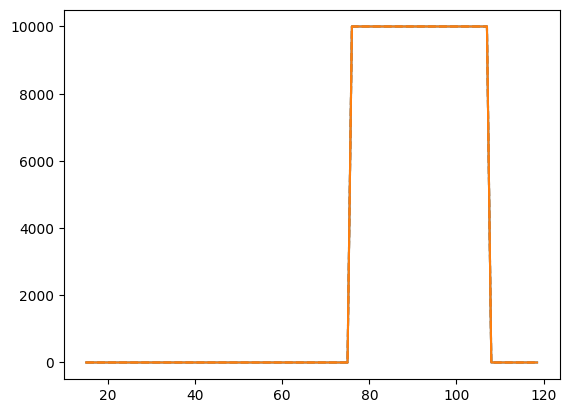

Looks good. Saving this to ttAlowMass_LHC13_CMS_138.json


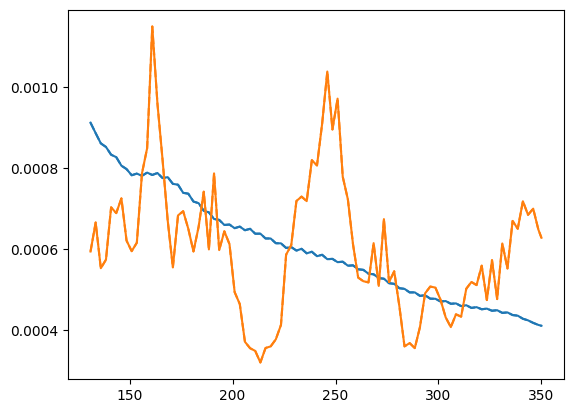

Looks good. Saving this to ttAhighMass_LHC13_CMS_138.json


In [7]:
os.system("wget 'https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(%24%5Cmu%5Cmu%24)%2C%20%24t%5Cbar%7Bt%7D%20%5Cphi%24%20Pseudoscalar/2/csv'")
os.system("head -n 231 csv > topcsv")
os.system("tail -n 225 csv > bottomcsv")

df1 = pd.read_csv(
    "topcsv",
    comment="#")
df2 = pd.read_csv(
    "bottomcsv",
    comment="#")

os.system("rm csv")
os.system("rm topcsv")
os.system("rm bottomcsv")

df = pd.DataFrame()
df["m"] = df1["$m_{\phi}$ [GeV]"]
df["obs"] = df1["Observed 95% CL upper limit on $\sigma B$ [pb]"]
df["exp"] = df2["Median expected 95% CL upper limit on $\sigma B$ [pb]"]

dflow = df[df["m"] < 120.0]
# Add grey block without limit to dflow
dflowgrey = pd.DataFrame(
    [
        {"m": 76.0, "obs": 10000, "exp": 10000},
        {"m": 107.0, "obs": 10000, "exp": 10000}
    ]
)
dflow = pd.concat([dflow, dflowgrey])
dflow.sort_values(by=["m"], inplace=True)
dflow.reset_index(inplace=True)

dfhigh = df[df["m"] > 130.0]
dfhigh.reset_index(inplace=True)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["Htt", "mumu"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t61",
    dflow,
    idSuffix=7,
    prefix="ttAlowMass",
    massResolution=resolution.mumu["light"],
    constraints={"CPValue": "odd"},
)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["Htt", "mumu"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t61",
    dfhigh,
    idSuffix=8,
    prefix="ttAhighMass",
    massResolution=resolution.mumu["light"],
    constraints={"CPValue": "odd"},
)

## `ggH>mumu` finite width [1907.03152](https://arxiv.org/abs/1907.03152)

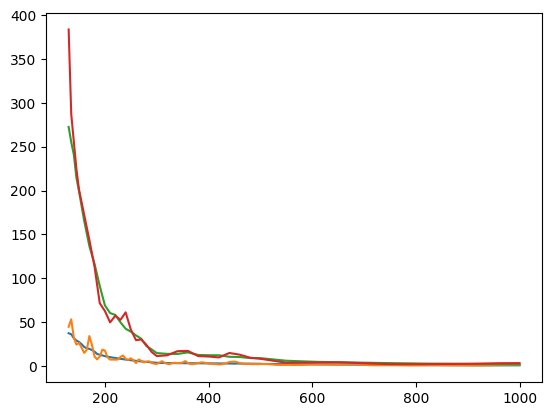

Looks good. Saving this to ggH_LHC13_CMS_36.json


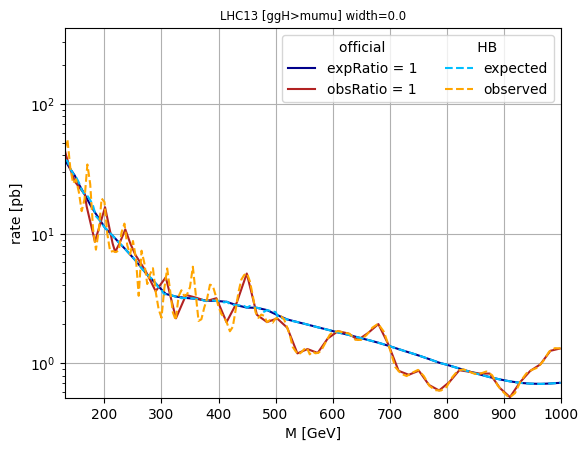

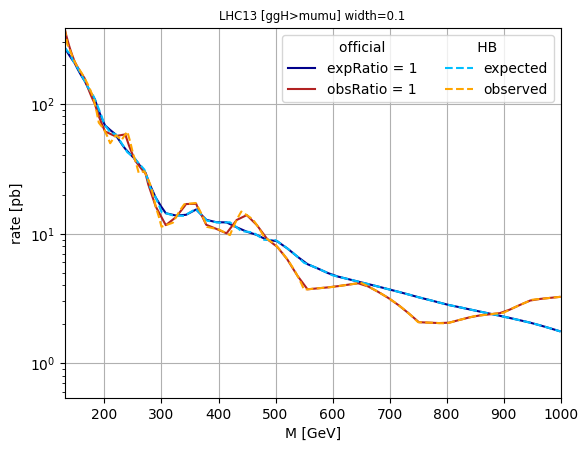

In [4]:
dfExp0 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1742776/Model%20Indepedent%20limits%20ggA%20(0%20width)/1/csv",
    comment="#",
    skiprows=287,
    names=["m", "exp", "unc-", "unc+"],
)

df0 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1742776/Model%20Indepedent%20limits%20ggA%20(0%20width)/1/csv",
    comment="#",
    skiprows=9,
    skipfooter=424 - 145,
    engine="python",
    names=["m", "obs"],
)
assert np.allclose(df0.m, dfExp0.m)
df0["exp"] = dfExp0.exp
df0["normWidth"] = 0

dfExp10 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1742776/Model%20Indepedent%20limits%20ggA%20(10%25%20width)/1/csv",
    comment="#",
    skiprows=97,
    names=["m", "exp", "unc-", "unc+"],
)

df10 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1742776/Model%20Indepedent%20limits%20ggA%20(10%25%20width)/1/csv",
    comment="#",
    skiprows=9,
    skipfooter=138 - 50,
    engine="python",
    names=["m", "obs"],
)
assert np.allclose(df10.m, dfExp10.m)
df10["exp"] = dfExp10.exp

# the grid for the 10% limits is sparser, so we interpolate it to the same grid as the 0% limit
from scipy.interpolate import interp1d

w10Lim = interp1d(df10.m, df10[["exp", "obs"]].to_numpy(), axis=0)
w10exp, w10obs = w10Lim(df0.m).transpose()
df10Dense = pd.DataFrame(
    data={"m": df0.m, "exp": w10exp, "obs": w10obs, "normWidth": 0.1}
)
df = pd.concat([df0, df10Dense], axis=0)

limitFile = implementChannelWidthLimit(
    "1907.03152",
    {"channels": [["ggH", "mumu"]]},
    "https://doi.org/10.17182/hepdata.90684",
    df,
    idSuffix=1,
    massResolution=resolution.mumu["light"],
)
lim = HB.Limit(limitFile)
validateChannelWidthLimit(lim)


## `bbH>mumu` finite width [1907.03152](https://arxiv.org/abs/1907.03152)

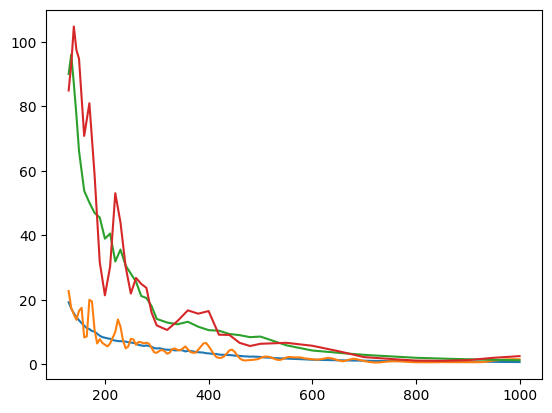

Looks good. Saving this to bbH_LHC13_CMS_36.json


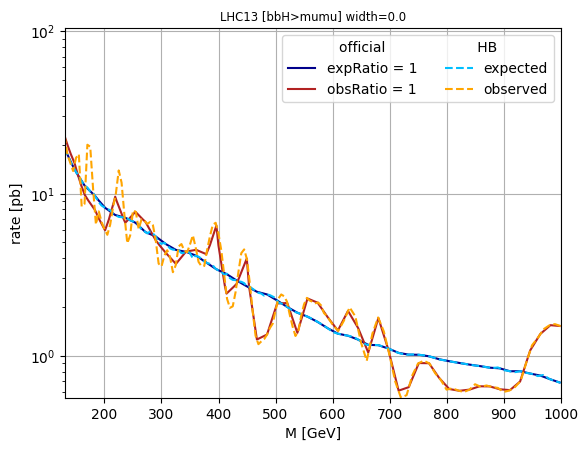

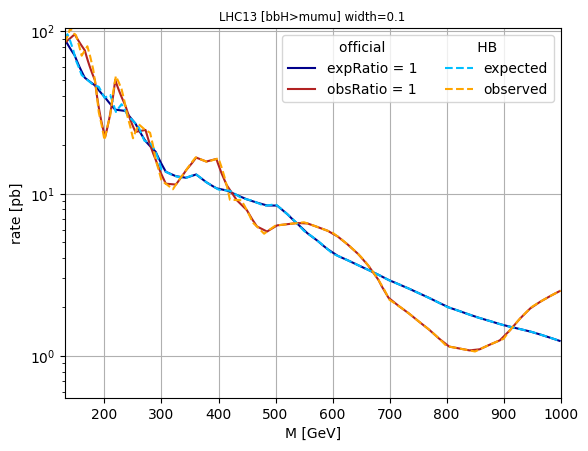

In [5]:
dfExp0 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1742776/Model%20Indepedent%20limits%20bbA%20(0%20width)/1/csv",
    comment="#",
    skiprows=287,
    names=["m", "exp", "unc-", "unc+"],
)

df0 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1742776/Model%20Indepedent%20limits%20bbA%20(0%20width)/1/csv",
    comment="#",
    skiprows=9,
    skipfooter=424 - 145,
    engine="python",
    names=["m", "obs"],
)
assert np.allclose(df0.m, dfExp0.m)
df0["exp"] = dfExp0.exp
df0["normWidth"] = 0

dfExp10 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1742776/Model%20Indepedent%20limits%20bbA%20(10%25%20width)/1/csv",
    comment="#",
    skiprows=97,
    names=["m", "exp", "unc-", "unc+"],
)

df10 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1742776/Model%20Indepedent%20limits%20bbA%20(10%25%20width)/1/csv",
    comment="#",
    skiprows=9,
    skipfooter=138 - 50,
    engine="python",
    names=["m", "obs"],
)
assert np.allclose(df10.m, dfExp10.m)
df10["exp"] = dfExp10.exp

# the grid for the 10% limits is sparser, so we interpolate it to the same grid as the 0% limit
from scipy.interpolate import interp1d

w10Lim = interp1d(df10.m, df10[["exp", "obs"]].to_numpy(), axis=0)
w10exp, w10obs = w10Lim(df0.m).transpose()
df10Dense = pd.DataFrame(
    data={"m": df0.m, "exp": w10exp, "obs": w10obs, "normWidth": 0.1}
)
df = pd.concat([df0, df10Dense], axis=0)

limitFile = implementChannelWidthLimit(
    "1907.03152",
    {"channels": [["bbH", "mumu"]]},
    "https://doi.org/10.17182/hepdata.90684",
    df,
    idSuffix=2,
    massResolution=resolution.mumu["light"],
)
lim = HB.Limit(limitFile)
validateChannelWidthLimit(lim)


## pp > hSM > mumu 13+8+7 TeV [1807.06325](https://arxiv.org/abs/1807.06325)

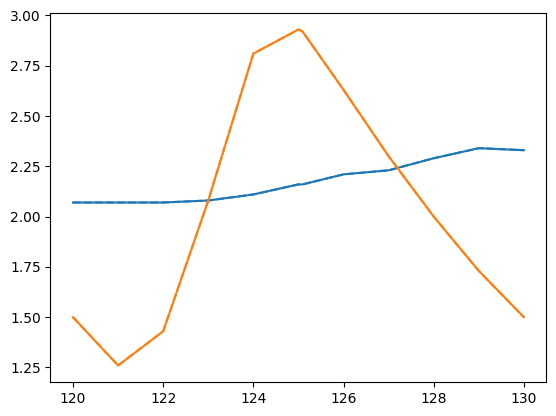

Looks good. Saving this to comb_LHC13_CMS_61.json
using effective coupling input for SM-normalized limit


/users/tp/biekoetter/.pyenv/versions/3.10.7/lib/python3.10/site-packages/Higgs/tools/LimitValidation.py:137: UserWarning: No contour levels were found within the data range.
  ax.contour(masses, rates, expR, levels=[1], colors=["darkblue"])
/users/tp/biekoetter/.pyenv/versions/3.10.7/lib/python3.10/site-packages/Higgs/tools/LimitValidation.py:138: UserWarning: No contour levels were found within the data range.
  ax.contour(masses, rates, obsR, levels=[1], colors=["firebrick"])


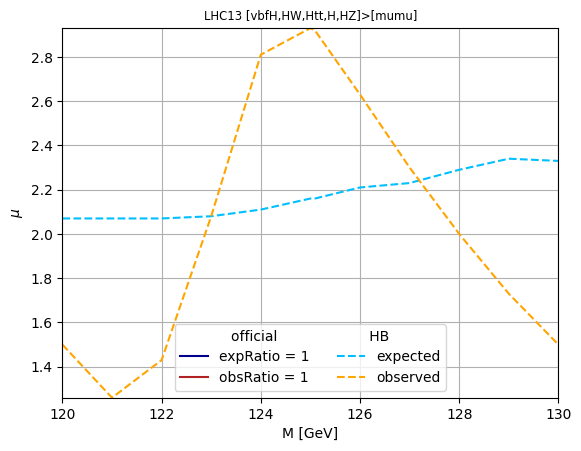

In [6]:
dfExp = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1682776/Limit%20(7%2C%208%2C%20and%2013%20TeV)/1/csv",
    comment="#",
    skiprows=25,
    skipfooter=71 - 38,
    engine="python",
    names=["m", "exp", "unc+", "unc-"],
)

df = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1682776/Limit%20(7%2C%208%2C%20and%2013%20TeV)/1/csv",
    comment="#",
    skiprows=9,
    skipfooter=71 - 22,
    engine="python",
    names=["m", "obs"],
)
assert np.allclose(df.m, dfExp.m)
df["exp"] = dfExp.exp  # fb to pb

process = {"channels": [[p, "mumu"] for p in ["H", "vbfH", "HZ", "HW", "Htt"]]}
limitFile = implementChannelLimit(
    "1682776",
    process,
    "https://doi.org/10.17182/hepdata.88058.v1/t1",
    df,
    luminosity=35.9 + 19.8 + 5.0,  # 13+8+7 TeV
    massResolution=resolution.mumu["light"],
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


# CMS 8TeV LHC

## `bbH>mumu` low mass [1707.07283](https://arxiv.org/abs/1707.07283)


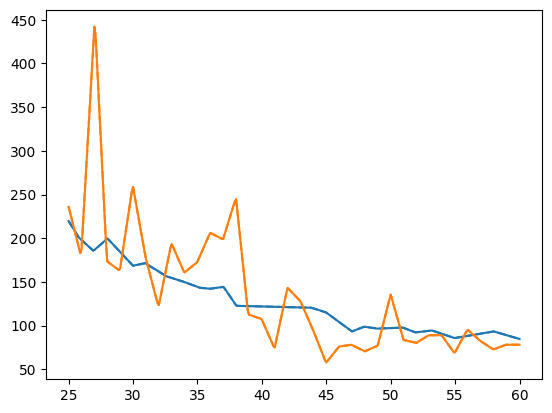

Looks good. Saving this to bbH_LHC8_CMS_20.json


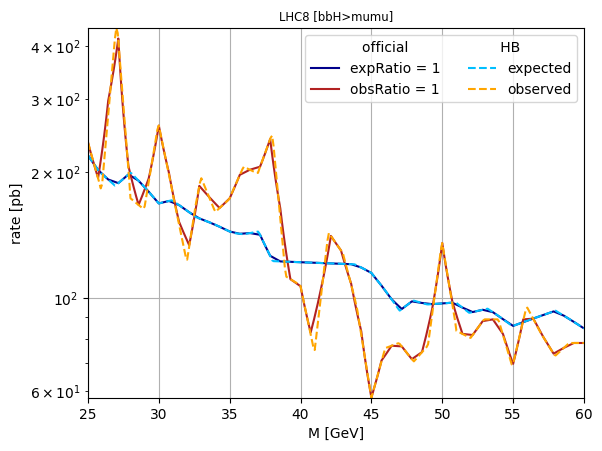

In [7]:
df = fromHB5Table1("15009_CMS_bbA_mumu_19.7fb-1", "CMS")
process = {"channels": [["bbH", "mumu"]]}
limitFile = implementChannelLimit(
    "1707.07283",
    process,
    "Fig. 5 (right)",
    df,
    collider="LHC8",
    massResolution=resolution.mumu["light"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `bbH>mumu` [1508.01437](http://arxiv.org/abs/1508.01437)


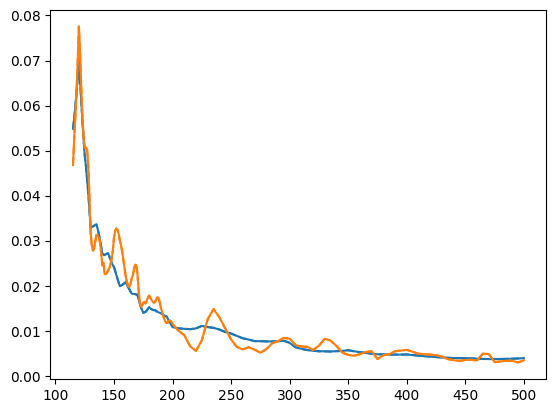

Looks good. Saving this to bbH_LHC8_CMS_19.json


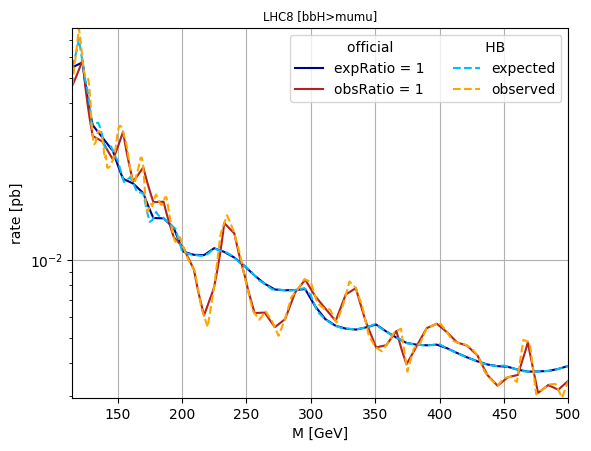

In [8]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1386854/Table%202/1/csv", skip=1
)
df = dfs[0].rename(
    columns={
        "mPHI [GeV]": "m",
        "95% CL upper limit on xsec x BR(PHI --> MU MU) (fb)": "obs",
    }
)
df["exp"] = dfs[1]["95% CL upper limit on xsec x BR(PHI --> MU MU) (fb)"]
df.obs *= 1e-3
df.exp *= 1e-3

limitFile = implementChannelLimit(
    "1508.01437",
    {"channels": [["bbH", "mumu"]]},
    "https://doi.org/10.17182/hepdata.70526.v1/t2",
    df,
    idSuffix=1,
    massResolution=resolution.mumu["light"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `ggH>mumu` [1508.01437](http://arxiv.org/abs/1508.01437)


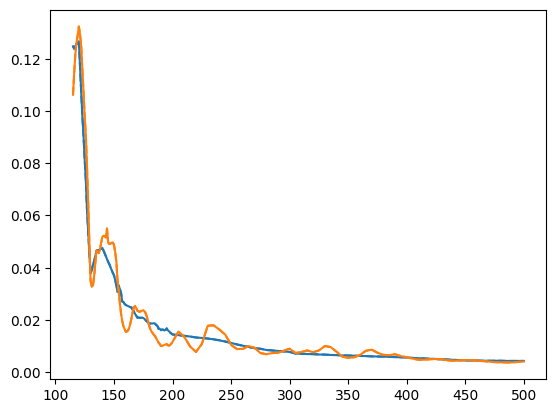

Looks good. Saving this to ggH_LHC8_CMS_19.json


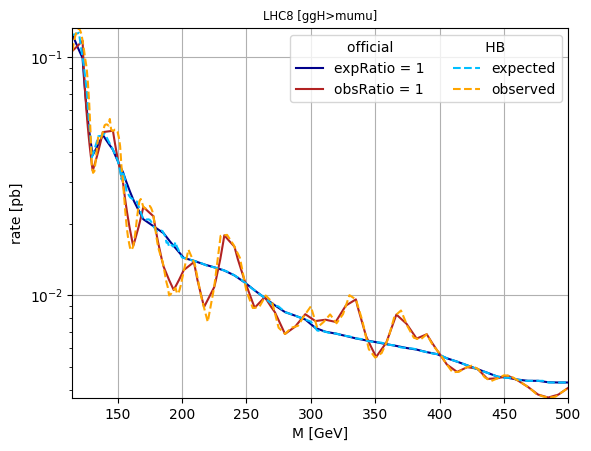

In [9]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1386854/Table%203/1/csv", skip=1
)
df = dfs[0].rename(
    columns={
        "mPHI [GeV]": "m",
        "95% CL upper limit on xsec x BR(PHI --> MU MU) (fb)": "obs",
    }
)
df["exp"] = dfs[1]["95% CL upper limit on xsec x BR(PHI --> MU MU) (fb)"]
df.obs *= 1e-3
df.exp *= 1e-3


limitFile = implementChannelLimit(
    "1508.01437",
    {"channels": [["ggH", "mumu"]]},
    "https://doi.org/10.17182/hepdata.70526.v1/t3",
    df,
    idSuffix=2,
    massResolution=resolution.mumu["light"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `hSM > mumu` 7+8TeV combination [1410.6679](https://arxiv.org/abs/1410.6679)

Multiple different luminosity values: [19.7, 5.0] using 19.7 unless you set it manually


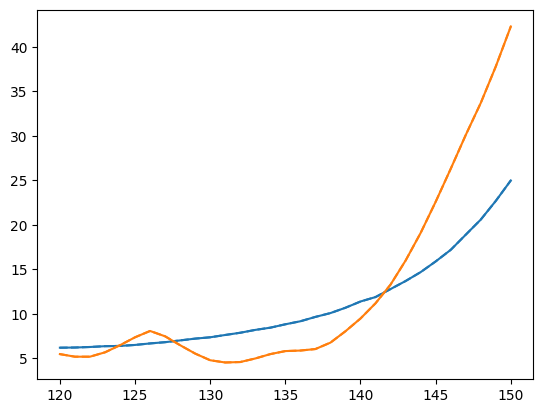

Looks good. Saving this to comb_LHC8_CMS_25.json
using effective coupling input for SM-normalized limit


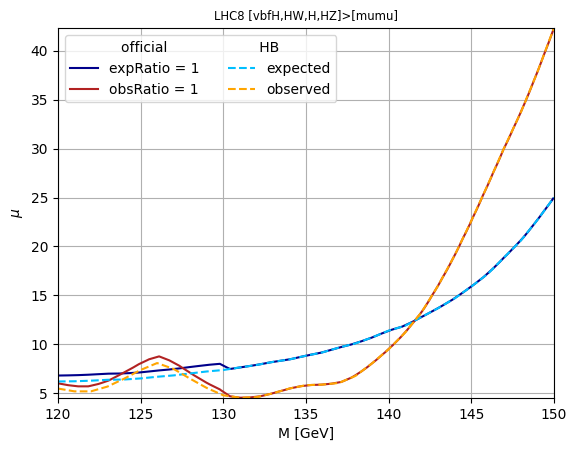

In [10]:
df = pd.DataFrame(
    {
        "m": np.arange(120, 150.1, 1),
        "obs": [
            5.49,
            5.20,
            5.20,
            5.69,
            6.49,
            7.38,
            8.09,
            7.49,
            6.49,
            5.55,
            4.80,
            4.55,
            4.60,
            5.00,
            5.49,
            5.83,
            5.89,
            6.06,
            6.78,
            8.06,
            9.49,
            11.2,
            13.3,
            16.0,
            19.1,
            22.6,
            26.3,
            30.1,
            33.7,
            37.8,
            42.3,
        ],
        "exp": [
            6.21,
            6.23,
            6.29,
            6.38,
            6.41,
            6.52,
            6.69,
            6.83,
            7.03,
            7.23,
            7.38,
            7.64,
            7.89,
            8.21,
            8.46,
            8.84,
            9.18,
            9.67,
            10.1,
            10.7,
            11.4,
            11.9,
            12.8,
            13.7,
            14.7,
            15.9,
            17.2,
            18.9,
            20.6,
            22.7,
            25.0,
        ],
    }
)
limitFile = implementChannelLimit(
    "1410.6679",
    {"channels": [[p, "mumu"] for p in ["H", "vbfH", "HZ", "HW"]]},
    "Fig. 2",
    df,
    idSuffix=1,
    luminosity=19.7 + 5,
    massResolution=resolution.mumu["light"],
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
